# Cat2Vec Embeddings for Categorical variables

In [1]:
from utilities.std_imports import *
from utilities.tf_imports import *

### Load data

In [2]:
ds = pd.read_csv(csv_path + 'time_series/bike_sharing_daily.csv')[['dteday', 'mth', 'cnt']]
ds.head()

,dteday,mth,cnt
0,1/1/2011,0,985
1,1/2/2011,0,801
2,1/3/2011,0,1349
3,1/4/2011,0,1562
4,1/5/2011,0,1600


### Build embeddings model

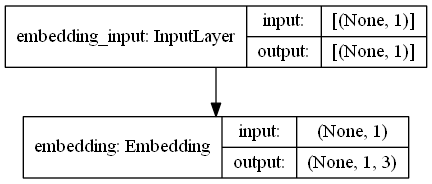

In [3]:
model = tkm.Sequential()
model.add(tkl.Embedding(input_dim = 12, output_dim = 3, input_length = 1, name="embedding"))
model.compile(loss = "mse", optimizer = "adam", metrics=["accuracy"])
tku.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [4]:
model.fit(x = ds['mth'], y=ds['cnt'], epochs = 50, batch_size = 1, verbose=0)

In [5]:
emb = model.predict([0,1,2,3,4,5,6,7,8,9,10,11])
emb = emb.reshape(12,3)
pd.DataFrame(emb)

,0,1,2
0,9.352674,9.374627,9.410823
1,9.355841,9.391006,9.347410
2,9.380726,9.434745,9.381113
3,9.734409,9.665648,9.754542
4,10.269500,10.323186,10.300501
5,10.244637,10.164725,10.214475
6,10.306709,10.319948,10.318830
7,10.300985,10.289497,10.218010
8,9.986387,9.916366,9.940274
9,9.966827,9.954995,9.932732


### Build complete model

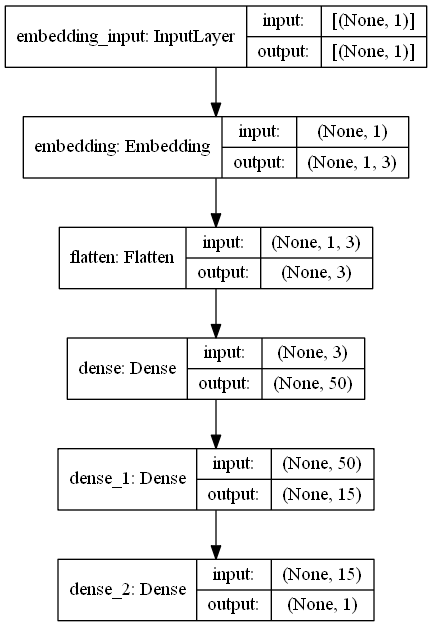

In [6]:
model = tkm.Sequential()
model.add(tkl.Embedding(input_dim = 12, output_dim = 3, input_length = 1, name="embedding"))
model.add(tkl.Flatten())
model.add(tkl.Dense(50, activation="relu"))
model.add(tkl.Dense(15, activation="relu"))
model.add(tkl.Dense(1))
model.compile(loss = "mse", optimizer = "adam", metrics=["accuracy"])
tku.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
model.fit(x = ds['mth'], y=ds['cnt'], epochs = 50, batch_size = 1, verbose=0)

In [8]:
pred = model.predict([0,1,2,3,4,5,6,7,8,9,10,11])
pd.DataFrame(pred)

,0
0,2198.666748
1,2669.583740
2,3762.006592
3,4501.268066
4,5343.064453
5,5766.574219
6,5534.289062
7,5696.790039
8,5782.725098
9,5204.213867


### Credits & Links

https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0  
https://medium.com/swlh/embedding-of-categorical-variables-for-deep-learning-model-explained-6aa8a1a04603